Dans ce TD, nous allons utiliser numpy et matplotlib. Voici comment les importer

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Voici quelques fonctions de numpy que nous allons utiliser:
- `np.arange`
- `np.sum`
- `np.polyfit`
- `np.mean`
- `np.std`
- `np.unique`
- `np.where`
- `np.reshape`
- `np.newaxis`

Certaines de ces fonctions sont aussi accessibles sous forme de méthode d'un tableau (par exemple np.mean(a) <=> a.mean())

On peut accéder à la documentation de la façon suivante : 

In [3]:
np.sum?

# Formule de Simpson

On rappelle la formule de Simpson pour le calcul approché d’une intégrale :
\begin{equation*}
\begin{split}
\int_a^bf(x)\mathrm dx \approx \Delta_x\sum_{i=0}^{N-1}\frac{f(x_i) + 4f(x_i+\frac{\Delta_x}2) + f(x_i + \Delta_x)}6 \equiv I(f;a,b,N) \end{split}
\end{equation*}
où $\Delta_x =\frac{b-a}N$ et $x_i = a + i\Delta_x$.
  
1. Ecrivez une fonction `simpson_slow` qui calcule l’intégrale d'une function $f$ entre $a$ et $b$ avec $N$ pas avec la méthode de Simpson en utilisant une boucle (for loop).

2. Ecrivez une autre fonction `simpson_fast` qui fait la même chose sans utiliser de boucle (on suposera que la fonction $f$ est vectorisée).

3. Calculez l’intégrale de $f(x) = \frac{1}{1+x^2}$ entre 0 et 1 pour $N=1000$ et comparez le temps entre les deux foncion en ecrirant `%timeit` avant la commande.

4. Calculez la valeur théorique $I^\star$ de l'intégrale et tracez en échelle logarithmique le residu $|I^\star - I(f,0,1,N)|$ par rapport à $N$. Qu'elle est la vitesse de convergence de cette intégrale ?

In [4]:
# 1.

def simpson_slow(f, a, b, N):
    dx = (b-a)/N
    x = a + np.arange(N)*dx
    integral = 0
    for i in range(N):
        integral += (f(x[i]) + 4*f(x[i]+dx/2) + f(x[i]+dx))*dx/6
    return integral

In [5]:
# 2.

def simpson_fast(f, a, b, N):
    dx = (b-a)/N
    x = a + np.arange(N)*dx
    return np.sum(f(x) + 4*f(x+dx/2) + f(x+dx))*dx/6

In [7]:
# 3.

def f(x):
    return 1/(1+x**2)

print("Temps d'exécution pour simpson_slow:")
%timeit simpson_slow(f, 0, 1, 1000)
print('\n')
print("Temps d'exécution pour simpson_fast:")
%timeit simpson_fast(f, 0, 1, 1000)

Temps d'exécution pour simpson_slow:
4.11 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Temps d'exécution pour simpson_fast:
46.7 µs ± 837 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
# 4.

La soluation analytique de l'intégrale est : $\int_0^1 \frac{dx}{1+x^2} = \arctan(x)|_0^1 = \pi/4$

In [9]:
N_array = np.arange(6,30)
residuum = []
for N in N_array:
    residuum.append(np.pi/4-simpson_fast(f, a=0, b=1, N=N))
# Remarque : utiliser une boucle for ici ne ralentit pas le code car
# 1/ le calcule de simpson prend relativement beaucoup de temps
# 2/ il y a moins de 30 itérations

L'intégrale converge en res(N)~ N^(-6.0)


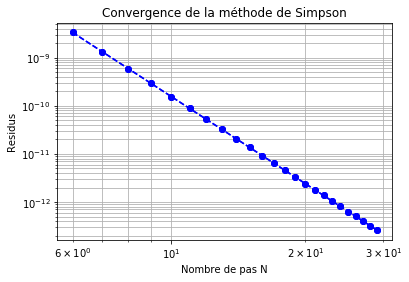

In [10]:
# 5.

plt.plot(N_array, residuum, 'bo--')
plt.loglog(N_array, residuum, 'bo--')
plt.title('Convergence de la méthode de Simpson')
plt.grid(which = 'both')
plt.ylabel('Residus')
plt.xlabel('Nombre de pas N')

gradient = np.polyfit(np.log(N_array), np.log(residuum), 1)[0]
print(f"L'intégrale converge en res(N)~ N^({gradient:0.1f})")

# Volume d'une sphère

Dans un premier temps, on considère un nuage de points $(x, y)$ dans un plan. Les variables $x$ et $y$ sont independantes et uniformement reparties entre -1 et 1.

1. En utilisant la fonction ``np.random.rand``, créer un nuage de $M$ points et tracer 
ce nuage. On pourra prendre $M=1000$

2. Tracer dans une autre couleur les points dans un cercle de rayon 1. 

3. En prenant $M$ assez grand (par exemple $10^8$), calculer la probabilité d'être dans le cercle. En déduire une estimation de la surface d'un disque de rayon 1. 

4. Même question que la question 3, mais dans un espace de dimension $N$. Par exemple $N=5$. On écrira une fonction.

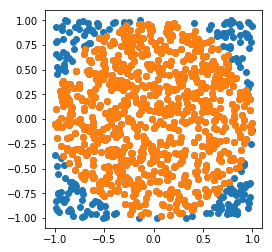

In [11]:
M = 1000
X, Y = 2*np.random.rand(M)-1, 2*np.random.rand(M)-1

fig = plt.figure()
ax = fig.subplots(1, 1)
ax.set_aspect(1)

ax.plot(X, Y, 'o')

mask = X**2 + Y**2<=1

ax.plot(X[mask], Y[mask], 'o')

In [12]:
M = 100000000
X, Y = 2*np.random.rand(M)-1, 2*np.random.rand(M)-1

mask = (X**2 + Y**2<=1) # C'est un tableau de BooléenS. 
vol = 2**2 * np.mean(mask) 
# Le volume est celui du carré (=2^2) 
# multiplié par la probabilité d'être dans le disque
# Lors des opération de somme (ou moyenne) d'un tableau de Booléens, 
# numpy va considérer que `False` vaut 0 et `True` 1.
print(f'Le volume est estimé à {vol:.5f}')

Le volume est estimé à 3.14157


In [13]:
def volume(M, N=2):
    P = 2*np.random.rand(M, N)-1
    Psquare = np.sum(P**2, axis=1)
    vol = 2**N * np.mean(Psquare<1)
    return vol

vol15 = volume(10000000, N=5)

print(f"Le volume d'une hyper-sphère de dimension 5 est estimé à {vol15:.5f}")

Le volume d'une hyper-sphère de dimension 5 est estimé à 5.26557


# Loi de Poisson

Une source lumineuse illumine un photomultiplicateur. Ce dispositif envoie un pulse digital d’environ 20 ns à chaque photon qu’il détecte. La sortie du photomultiplicateur est connectée à un dispositif informatique qui permet de compter le nombre de pulses reçu pendant une durée determinée.

Le nombre de photons qui arrive pendant une durée donnée suit une loi de Poisson, c’est à dire que la probabilité de détecter $k$ photons est donnée par :
\begin{equation*}
\begin{split}p(k) = \frac{\lambda^k}{k!}e^{-\lambda}\end{split}
\end{equation*}
où $\lambda$ est le nombre moyen de photons. Le paramètre $\lambda$ sera proportionnel à la durée $t_0$ pendant laquelle on mesure le nombre de photons : $\lambda = \Gamma t_0$.

On rappelle que l’écart type de la loi de Poisson vaut $\sqrt{\lambda}$

1. Le fichier de données est enregistré sour forme d’un fichier texte. Chaque point correspond à une mesure de durée $t_0=200\mathrm{\mu s}$. Lire le fichier et le convertir en entier: 
```
fichier = "100secondes_200us_count.txt"
data = np.loadtxt(fichier, dtype=int)
```
Quel est le nombre moyen de photons reçu par seconde ?

2. Calculez l’écart type et vérifiez qu’il vaut $\sqrt{\lambda}$.


3. En utilisant la fonction `numpy.unique`, avec l’option `return_counts=True`, tracez la distribution de probabilité (créez un histogramme).

4. Tracez les points représentants $p(k)/p(k+1)$.

5. Soit $x_i$ le nombre de photons détectés au cours de la mesure numéro $i$. On veut simuler un jeu de données correspondant à des mesures prise pendant un temps $t = Nt_0$. On défini la variable $x^N_j$ par
\begin{equation*}
x^N_j = \sum_{i=0}^{i=N-1} x_{Nj+i}
\end{equation*}
Écrivez une fonction python `somme_par_paquet(x,N)` qui effectue cette opération. Si la taille du tableau d’entrée n’est pas un multiple de N, on suprimera des points au début du tableau. Evidement les boucles `for` sont interdites ! On transformera le tableau en un tableau 2D et on fera une somme par ligne (`np.sum(array, axis=1)`).
Tracez au cours du temps le flux de photons pris en intégrant sur 100 ms, i.e. $N=500$.


6. On peut créer un générateur de bits aléatoires à partir de cette séquence : si $x_{2j}>x_{2j+1}$ alors on prend 1, si $x_{2j}<x_{2j+1}$ on prend 0, sinon on élimine le point $j$.
Créez une fonction `bits_aleatoires(data)` qui engendrer cette suite de bits aléatoire que l’on appellera $a_j$ - une fois avec et sans de boucle `for`. Comparez les temps.

 
7. On peut ensuite créer une suite de nombre aléatoire $\{b_j\}$ entre 0 et 1 en regroupant les bits $\{a_i\}$ dans une manière que $b_j$ soit écrit en binaire comme $(a_{Nj}, a_{Nj+1}, ... , a_{N(j+1) -1 })$. On prendra par exemple N=11.
\begin{equation*}
b_j = \sum_{i=0}^{i=N-1} \frac{a_{Nj+i}}{2^{i+1}} \in [0,1]
\end{equation*}
Si $n=|\{a_j\}|$, le nombre d'elements dans la suite $\{a_j\}$, n'est pas divisible par $N$, supprimez les premiers $n\%N$ elements.

8. Si X et Y sont deux variables aléatoires ayant une distribution uniforme entre 0 et 1, alors on a
\begin{equation*}
P(X^2 + Y^2<1) = \frac{\pi}{4}
\end{equation*}
Déterminez $\pi$ en utilisant notre générateur de nombre aléatoire.


In [14]:
fichier = "100secondes_200us_count.txt"
data = np.loadtxt(fichier, dtype=int) # data sous la forme d'un tableau de dimension 1

In [26]:
# 1.

t0 = 200E-6
flux_moyen = np.mean(data)/t0
print(f'flux_moyen: {flux_moyen} photons/s')

flux_moyen: 22972.79 photons/s


In [27]:
# 2.
print('Deviation standard :', data.std()) #  on peut aussi utiliser np.std(data)
print('Racine carré de la moyenne :', np.sqrt(data.mean()))

Deviation standard : 2.1401156007645943
Racine carré de la moyenne : 2.1434920107152253


Text(0,0.5,'Probabilité p(k)')

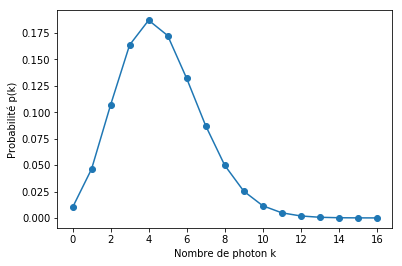

In [28]:
# 3.
values, count = np.unique(data, return_counts=True)
plt.plot(values, count/np.sum(count), '-o')
plt.xlabel('Nombre de photon k')
plt.ylabel('Probabilité p(k)')

Text(0,0.5,'$p(k)/p(k+1)$')

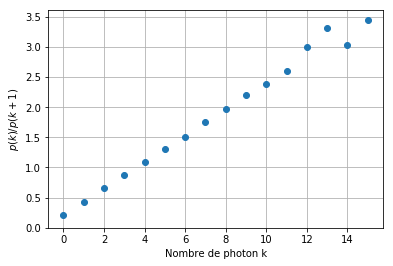

In [29]:
# 4.
plt.plot(count[:-1]/count[1:], 'o')
plt.grid()
plt.ylim(0, None)
plt.xlabel('Nombre de photon k')
plt.ylabel('$p(k)/p(k+1)$') # Utilisation de Latex

In [30]:
# 5.

def somme_par_paquet(x, N):
    x = x[len(x)%N:]
    x = x.reshape((len(x)//N, N))
    return x.sum(axis=1)

def moyenne_par_paquet(x, N):
    return somme_par_paquet(x, N)/N

assert np.all(somme_par_paquet(np.arange(9), 2)==np.array([3, 7, 11, 15]))

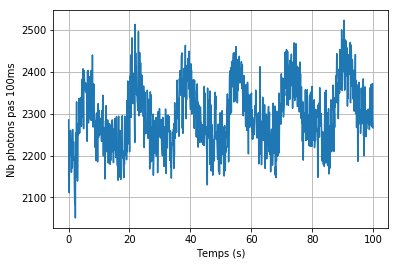

In [31]:
t = np.arange(len(data))*t0
plt.plot(moyenne_par_paquet(t, 500), somme_par_paquet(data, 500))
plt.xlabel('Temps (s)')
plt.ylabel('Nb photons pas 100ms')
plt.grid()

In [38]:
# 6.

def bits_aleatoires_slow(data):
    N = len(data)//2 # integer division
    bits = []
    for i in range(N):
        if data[2*i]>data[2*i+1]:
            bits.append(1)
        elif data[2*i]<data[2*i+1]:
            bits.append(0)
    return np.array(bits)

# Nous verrons l'utilisation de numba dans un prochain cours
import numba as nb
@nb.njit
def bits_aleatoires_numba(data):
    N = len(data)//2 # integer division
    bits = np.zeros(N)
    k = 0
    for i in range(N):
        if data[2*i]>data[2*i+1]:
            bits[k] = 1
            k += 1
        elif data[2*i]<data[2*i+1]:
            bits[k] = 0
            k += 1
    return bits[:k]
bits_aleatoires_numba(data)

array([0., 1., 1., ..., 0., 0., 1.])

In [39]:
def bits_aleatoires_fast(data):
    N = len(data)//2
    dx = data[:N:2] - data[1:N:2]
    dx = dx[dx!=0]
    return np.where(dx>0, 1, 0)

In [40]:
print('Durée pour bits_aleatoires_slow:')
%timeit bits_aleatoires_slow(data)
print('\nDurée pour bits_aleatoires_numba:')
%timeit bits_aleatoires_numba(data)
print('\nDurée pour bits_aleatoire_fast:')
%timeit bits_aleatoires_fast(data)

Durée pour bits_aleatoires_slow:
189 ms ± 3.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Durée pour bits_aleatoires_numba:
1.45 ms ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Durée pour bits_aleatoire_fast:
1.06 ms ± 3.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
# 7.

data_bits = bits_aleatoires_fast(data)
N = 11

data_bits = data_bits[len(data_bits)%N:]
data_bits = data_bits.reshape((len(data_bits)//N, N))
data_bits
coef = 1/2**(1+np.arange(N))
nb_aleatoires = (data_bits*coef[np.newaxis, :]).sum(axis=1) 
# np.newaxis permet de transformé le tableau de dimension 1 en un tableau de dimension 2

In [42]:
# 8.

nb_aleatoires = nb_aleatoires[len(nb_aleatoires)%2:] # on garde un nombre pair de points
X = nb_aleatoires[::2] # indices pairs
Y = nb_aleatoires[1::2] # indices impairs
# The probability is the number of times a sample fullfills the condition 
# divided by the total number of samples
np.sum(X**2 + Y**2 < 1)/len(X) * 4

3.1450629825274277